# Data Science Programming1 -2

### 감마분포의 파라미터

감마분포의 확률 밀도 함수는 다음과 같습니다:

$ f(x; k, \theta) = \frac{1}{\theta^k \Gamma(k)} x^{k-1} e^{-\frac{x}{\theta}}, \quad \text{for } x \geq 0 $

여기서,
- $ k $는 형상 모수(shape parameter)로서 양의 실수입니다.
- $ \theta $는 비율 모수(rate parameter)로서 양의 실수입니다.
- $ \Gamma(k) $은 감마 함수(Gamma function)로, $ \Gamma(k) = \int_0^\infty t^{k-1} e^{-t} \, dt $입니다.

감마분포는 주로 양수 값을 가지는 연속형 변수의 분포를 모델링하는 데 사용됩니다. 예를 들어, 사건 발생 횟수, 고장 시간, 생존 분석 등 다양한 분야에서 응용됩니다.

**형상 모수 $k $:**
형상 모수는 감마분포의 모양(shape)을 결정합니다. $k $가 클수록 분포는 더 대칭적이고 중심으로부터 더 멀리 퍼져 있습니다. $k $는 양의 실수이며, 일반적으로 $k > 0 $입니다.

**비율 모수 $\theta $:**
비율 모수는 감마분포의 척도(scale)를 결정합니다. $\theta $가 클수록 데이터가 더 큰 값으로 퍼질 가능성이 높습니다. $\theta $는 양의 실수이며, 일반적으로 $\theta > 0 $입니다


(슬슬 디테일이나 증명에 집착하다가 시간 많이 날리는 그런 느낌이 온다.)<br>
(우선 교수님이 중요하지 않다고 말 한 부분은 그냥 넘어가자)

# 데이터를 보고 어떻게 모델을 만들지???   


1.적률생성함수 <br>
2.최대우도추정

Sample moments (instance) = distribution moments (supporter) <br>
데이터로부터 분포의 파라미터 계산?(?)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def estimate_gamma_params(data):
    x_bar = np.mean(data)     # 표본의 평균 계산
    s2 = np.var(data, ddof=1) # 표본의 분산 계산 (ddof=1은 비편향 분산 추정값을 사용)
    k_est = x_bar**2 / s2    # shape parameter k 추정
    theta_est = s2 / x_bar    # rate parameter theta 추정
    return k_est, theta_est

data = np.array([2.3, 4.5, 6.7, 8.9, 10.1])
k_est, theta_est = estimate_gamma_params(data)

print("Estimated shape parameter (k):", k_est)
print("Estimated rate parameter (theta):", theta_est)


Estimated shape parameter (k): 4.183168316831683
Estimated rate parameter (theta): 1.5538461538461539


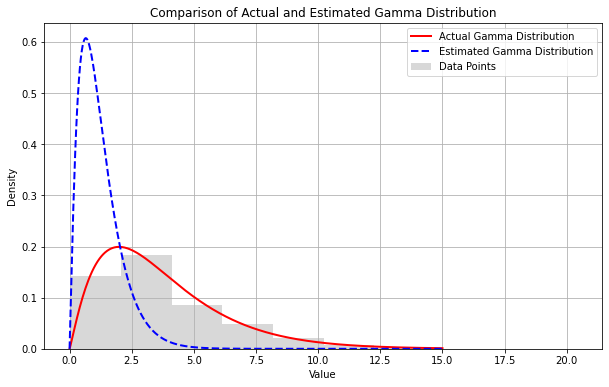

In [56]:
# 실제 감마분포와 추정된 감마분포 그래프 그리기
x = np.linspace(0, 15, 400)  # 그래프를 그릴 x 범위 설정
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 실제 감마분포 plot
plt.plot(x, gamma.pdf(x, a=np.mean(data)**2 / np.var(data), scale=np.var(data) / np.mean(data)),
         'r-', lw=2, label='Actual Gamma Distribution')

# 추정된 감마분포 plot
plt.plot(x, gamma.pdf(x, a=k_est, scale=1/theta_est),
         'b--', lw=2, label='Estimated Gamma Distribution')

# 데이터 포인트 표시
plt.hist(data, bins=10, density=True, color='gray', alpha=0.3, label='Data Points')

plt.title('Comparison of Actual and Estimated Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.grid(True)  # 그리드 표시
plt.show()


# 실제 감마샘플

Estimated shape parameter (k): 2.1122141549847138
Estimated rate parameter (theta): 1.9184846166999527
Estimated mean parameter (mu): 4.052250363514063
Estimated standard deviation parameter (sigma): 2.7882216528494506


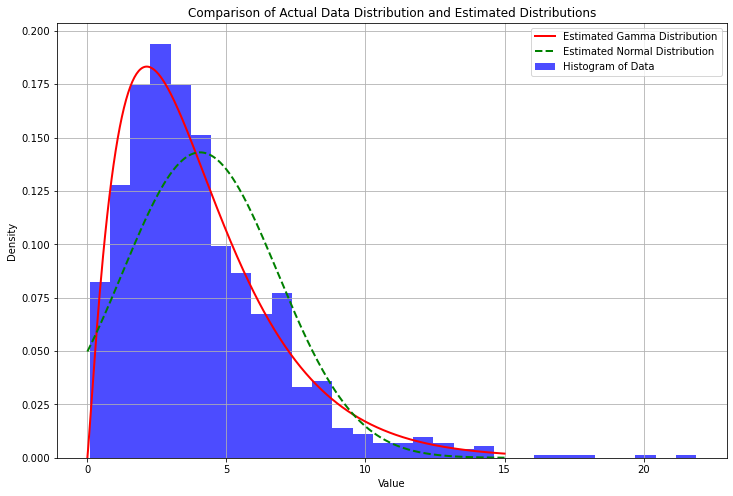

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

# Given parameters
k = 2.0  # Shape parameter (k > 0)
theta = 2.0  # Scale parameter (theta > 0)
sample_size = 1000  # Number of samples

# Generate random samples from gamma distribution
data = np.random.gamma(k, theta, sample_size)

# Function to estimate gamma distribution parameters
def estimate_gamma_params(data):
    x_bar = np.mean(data)     # Sample mean calculation
    s2 = np.var(data, ddof=1)  # Sample variance calculation (ddof=1 for unbiased estimate)
    k_est = x_bar**2 / s2      # Estimated shape parameter k
    theta_est = s2 / x_bar     # Estimated rate parameter theta
    return k_est, theta_est

# Function to estimate normal distribution parameters
def estimate_normal_params(data):
    mu_est = np.mean(data)      # Estimated mean parameter mu
    sigma_est = np.std(data, ddof=1)  # Estimated standard deviation parameter sigma
    return mu_est, sigma_est

# Estimate gamma distribution parameters from the data
k_est, theta_est = estimate_gamma_params(data)

# Estimate normal distribution parameters from the data
mu_est, sigma_est = estimate_normal_params(data)

print("Estimated shape parameter (k):", k_est)
print("Estimated rate parameter (theta):", theta_est)
print("Estimated mean parameter (mu):", mu_est)
print("Estimated standard deviation parameter (sigma):", sigma_est)

# Plotting the actual data histogram
plt.figure(figsize=(12, 8))

# Plot histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', label='Histogram of Data')

# Plot estimated gamma distribution
x = np.linspace(0, 15, 400)
gamma_pdf = gamma.pdf(x, k_est, scale=theta_est)
plt.plot(x, gamma_pdf, 'r-', lw=2, label='Estimated Gamma Distribution')

# Plot estimated normal distribution
normal_pdf = norm.pdf(x, mu_est, sigma_est)
plt.plot(x, normal_pdf, 'g--', lw=2, label='Estimated Normal Distribution')

# Plot settings
plt.title('Comparison of Actual Data Distribution and Estimated Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# MLE (최대우도추정)